<a href="https://colab.research.google.com/github/suulee/Machine-learning/blob/master/assignment04/assignment04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow==1.12.0
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
uploaded=files.upload()

Saving data_train1.csv to data_train1.csv


In [0]:
path = "data_train1.csv"

data = np.genfromtxt(path, delimiter=',')

len_train=len(data)
x_data = data[:,0:3]
y_data = []

for i in range(len_train):
  temp=[data[i,3]]
  y_data.append(temp)


#y_train = []
#y_train.extend(data[:,-1])
#num_data=len(x_data)

In [0]:
import csv
x_train=[]
y_train=[]

with open('data_train1.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 0
    for i in reader:
      x_train.append([])
#      y_train.append([])
      x_train[ct].extend(i[0:3])
      ct+=1
      y_train.append([i[3]])

#x_train=x_train.T()

#with open('data_test.csv', newline='') as myfile:
 #   reader  = csv.reader(myfile, delimiter=',')
  #  ct = 1 
   # for i in reader:
    #    print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
     #   ct += 1


In [64]:
theta1=tf.Variable(tf.random_normal([3,1],name='weight'))
theta0=tf.Variable(tf.random_normal([1],name='bias'))

X=tf.placeholder(tf.float32,shape=[None,3])
Y=tf.placeholder(tf.float32,shape=[None,1])


## hypothesis X*theta1+theta0
hypothesis= tf.matmul(X,theta1)+theta0

## Cost/loss function
cost= 0.5*tf.reduce_mean(tf.square(hypothesis-Y))

## Minimize
optimizer=tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train=optimizer.minimize(cost)

## Launch the graph in a session
sess=tf.Session()

theta0_history=[]
theta1_history=[]
cost_history=[]
cost_test_history=[]


## Initializes global variables in the graph
sess.run(tf.global_variables_initializer())

for step in range(9001):
    theta0_val,theta1_val,cost_val,_=sess.run([theta0,theta1,cost,train], feed_dict={X:x_data, Y:y_data})
    cost_test_val=sess.run(cost, feed_dict={X:x_test, Y:y_test})
  #  cost_test_history.append(sess.run(0.5*tf.reduce_mean(tf.square(x_test@theta1_val+theta0_val-y_test))))
    cost_test_history.append(cost_test_val)
    temp=[]
    temp.extend(theta1_val[0])
    temp.extend(theta1_val[1])
    temp.extend(theta1_val[2])

    theta0_history.extend(theta0_val)
    theta1_history.append(temp)
    cost_history.append(cost_val)
    if step%200==0:
      print(step,"cost:",cost_val)

0 cost: 111901.3
200 cost: 1267.5062
400 cost: 1261.7644
600 cost: 1257.3607
800 cost: 1253.9417
1000 cost: 1251.2505
1200 cost: 1249.1005
1400 cost: 1247.3562
1600 cost: 1245.9187
1800 cost: 1244.7152
2000 cost: 1243.6929
2200 cost: 1242.8124
2400 cost: 1242.0444
2600 cost: 1241.3673
2800 cost: 1240.7644
3000 cost: 1240.2238
3200 cost: 1239.735
3400 cost: 1239.291
3600 cost: 1238.8855
3800 cost: 1238.5144
4000 cost: 1238.1726
4200 cost: 1237.8582
4400 cost: 1237.5674
4600 cost: 1237.2985
4800 cost: 1237.0493
5000 cost: 1236.818
5200 cost: 1236.6034
5400 cost: 1236.4037
5600 cost: 1236.2177
5800 cost: 1236.0446
6000 cost: 1235.8832
6200 cost: 1235.732
6400 cost: 1235.5916
6600 cost: 1235.4598
6800 cost: 1235.3367
7000 cost: 1235.2212
7200 cost: 1235.1132
7400 cost: 1235.0117
7600 cost: 1234.9164
7800 cost: 1234.827
8000 cost: 1234.7426
8200 cost: 1234.663
8400 cost: 1234.588
8600 cost: 1234.5175
8800 cost: 1234.4503
9000 cost: 1234.387


In [7]:
print(theta1_history[-1])

[0.59573, -1.6109319, 4.020311]


In [0]:
print(W1)

[1.3462535, 1.5100642, 1.5259129, 1.5264614, 1.5254287, 1.5242333, 1.5230222, 1.5218104, 1.5205996, 1.5193899, 1.5181813, 1.5169739, 1.5157675, 1.5145621, 1.513358, 1.5121549, 1.510953, 1.509752, 1.5085523, 1.5073537, 1.5061561, 1.5049597, 1.5037643, 1.50257, 1.5013769, 1.5001848, 1.4989939, 1.497804, 1.4966153, 1.4954276, 1.494241, 1.4930555, 1.4918711, 1.4906878, 1.4895056, 1.4883245, 1.4871445, 1.4859655, 1.4847876, 1.4836107, 1.4824351, 1.4812605, 1.4800869, 1.4789145, 1.4777431, 1.4765729, 1.4754037, 1.4742355, 1.4730685, 1.4719025, 1.4707376, 1.4695737, 1.468411, 1.4672493, 1.4660887, 1.4649291, 1.4637706, 1.4626132, 1.4614569, 1.4603016, 1.4591475, 1.4579942, 1.4568422, 1.4556911, 1.4545411, 1.4533921, 1.4522443, 1.4510975, 1.4499518, 1.4488071, 1.4476634, 1.4465209, 1.4453794, 1.4442389, 1.4430995, 1.4419612, 1.4408239, 1.4396876, 1.4385524, 1.4374182, 1.4362851, 1.4351531, 1.4340221, 1.4328921, 1.4317632, 1.4306352, 1.4295084, 1.4283826, 1.4272579, 1.4261342, 1.4250115, 1.4238

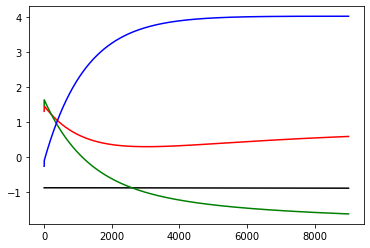

In [5]:
W1=[]
W2=[]
W3=[]
for i in theta1_history:
  W1.append(i[0])
  W2.append(i[1])
  W3.append(i[2])

plt.plot(theta0_history,color='black')
plt.plot(W1,color='red')
plt.plot(W2,color='green')
plt.plot(W3,color='blue')

plt.show()

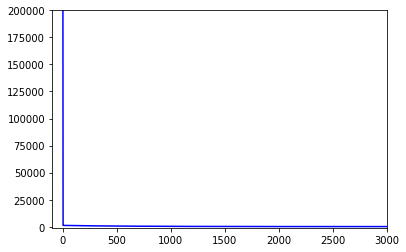

In [8]:
plt.plot(cost_history,color='blue')
plt.axis([-100,3000,-1000,200000])
plt.show()

In [17]:
uploaded=files.upload()

Saving data_test1.csv to data_test1.csv


In [0]:
path = "data_test1.csv"

data = np.genfromtxt(path, delimiter=',')

len_train=len(data)
x_test = data[:,0:3]
y_test = []

for i in range(len_train):
  temp=[data[i,3]]
  y_test.append(temp)

#y_train = []
#y_train.extend(data[:,-1])
#num_data=len(x_data)

In [51]:
print(y_test)

[[-14.05581792], [20.5049049], [-73.84314765], [-24.64493708], [31.93465663], [58.83605979], [-20.81499877], [-30.47047618], [51.86912832], [61.84193675], [-2.144496499], [-27.30800325], [69.04679778], [87.11940541], [-32.53557398], [-0.994475029], [65.44186802], [103.9376607], [-25.05239621], [-18.32294305], [121.458774], [60.55497834], [-11.65023367], [97.47254051], [121.456675], [40.78257154], [124.3458929], [146.2148], [132.9066693], [13.53012782], [127.1223761], [123.7394598], [27.25613104], [126.912366], [24.42582697], [189.3488215], [145.5050905], [100.8476893], [154.7531375], [98.01640019], [117.1013955], [74.4929357], [203.3442286], [191.5535939], [95.6890969], [187.5514805], [145.2802658], [164.11198], [142.3823476], [144.0158571], [98.08010673], [189.7548933], [90.97767739], [105.8263164], [157.2106479], [132.0408861], [251.3870102], [100.736975], [102.4929472], [139.7801979], [179.9892253], [108.0280627], [193.9589862], [94.75123649], [246.2394241], [122.9193162], [210.0426

In [21]:
print(theta1_history[-1])

[0.59573, -1.6109319, 4.020311]


In [0]:
cost_test_history.append(0.5*tf.reduce_mean(tf.square(x_test@theta1_val+theta0_val-y_test)))
    

In [58]:
print(sess.run(0.5*tf.reduce_mean(tf.square(x_test@theta1_val+theta0_val-y_test))))

3.073444415678263


In [63]:
print(cost_test_history)

1163.9208


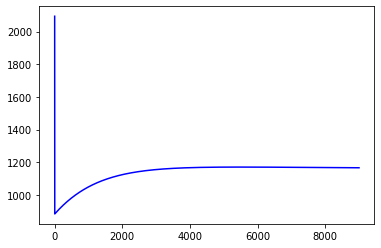

In [65]:
plt.plot(cost_test_history,color='blue')
#plt.axis([-100,3000,-1000,200000])
plt.show()

In [12]:
i=0
## hypothesis X*theta1+theta0
hypothesis= x_test[i]@theta1_history[-1]+theta0_history[-1]

## Cost/loss function
cost= 0.5*tf.reduce_mean(tf.square(hypothesis-Y))


ValueError: ignored